# Data Processing script for the NSM/SWEML v2.0
This .ipynb script uses python module for retrieving NASA ASO observations, locating nearest SNOTEL sites, connecting SNOTEL obs with ASO obs, and add geospatial features to the ML training/testing/hindcast dataframes.

# Next steps 

- the SE and SW rockies have the same number of sites, make sure they are not the same...
- process ASO data, e.g. swe_m < 0.1 = 0, convert to cm to be consistent with monitoring sites and traditional mesurement. 
- document scripts
- add new sites (e.g., regionval) to training DF with all the respective spatial resolution information
- add precipitation phase features (seasonal accumulated rain precip, seasonal accumulated snow precip as a function of temperature)
- explore adding other features stemming from SNOTEL, remote sensing (LULC), Snow Classifications (Sturms), energy balance

In [2]:
import os
HOME = os.path.expanduser('~')

region_list =    [ 'S_Sierras', 
                'N_Sierras',
                'Greater_Yellowstone',
                'N_Co_Rockies',
                'SW_Mont',
                'SW_Co_Rockies',
                'GBasin',
                'N_Wasatch',
                'N_Cascade',
                'S_Wasatch',
                'SW_Mtns',
                'E_WA_N_Id_W_Mont',
                'S_Wyoming',
                'SE_Co_Rockies',
                'Sawtooth',
                'Ca_Coast',
                'E_Or',
                'N_Yellowstone',
                'S_Cascade',
                'Wa_Coast',
                'Greater_Glacier'
                ]

In [ ]:
from ASOget import ASODownload, ASODataProcessing

# Inputs for fetching ASO data for a region
short_name = 'ASO_50M_SWE'
version = '1'
time_start = '2013-04-02T00:00:00Z'
time_end = '2019-07-19T23:59:59Z'
#region_list = ['S_Sierras']
output_res = 300 #desired spatial resoultion in meters (m)
directory = "Raw_ASO_Data"

#Get ASO data
for region in region_list:
    print(region)
    folder_name = f"{region}/{directory}"
    data_tool = ASODownload(short_name, version)
    b_box = data_tool.BoundingBox(region)  
    url_list = data_tool.cmr_search(time_start, time_end, region, b_box)
    data_tool.cmr_download(directory, region)

    #Convert ASO tifs to parquet
    data_processor = ASODataProcessing()
    data_processor.convert_tiff_to_parquet_multiprocess(folder_name, output_res, region) 

## Get Snotel and CDEC in situ observations
- clean in situ observations, specifically the CDEC sites, need a data processing method to remove outtliers and nan/0 obs
- put snotel sites in SI vs current in
- Ideas - add nearest sites elevation, distance from cell, then can bypass sites with bad data. - change nearest_sites name to ns, change snotel to cm or meters

In [ ]:
import importlib
importlib.reload(get_InSitu_obs)

In [ ]:
# Get in situ observations
import get_InSitu_obs
import numpy as np

#make a list of dates to aligns with the ASO observations (they go as early as Jan-29 and as far out as the July-17)
years = np.arange(2016,2020,1)
start_month_day = '10-01'
end_month_day = '07-31'
#datelist = get_InSitu_obs.make_dates(years, start_month_day, end_month_day, WY = True)

# observations 
bad_sites = get_InSitu_obs.Get_Monitoring_Data_Threaded_dp(years, start_month_day, end_month_day, WY = True)

In [38]:
import pandas as pd
import numpy as np

snotel_path = f"{HOME}/SWEMLv2.0/data/SNOTEL_Data"
year_df = pd.read_parquet(f"{snotel_path}/2015_ground_measures_dp.parquet")

year_df = year_df.replace({-9999.0: np.nan})
year_df.head(5)


,CDEC:ALP,CDEC:AGP,CDEC:BLC,CDEC:BCH,CDEC:BLD,CDEC:BLA,CDEC:BCB,CDEC:ADM,CDEC:BLS,CDEC:BMW,...,SNOTEL:975_WA_SNTL,SNOTEL:978_ID_SNTL,SNOTEL:981_MT_SNTL,SNOTEL:982_WY_SNTL,SNOTEL:984_WA_SNTL,SNOTEL:988_ID_SNTL,SNOTEL:989_ID_SNTL,SNOTEL:990_WA_SNTL,SNOTEL:992_UT_SNTL,SNOTEL:999_WA_SNTL
dates,,,,,,,,,,,,,,,,,,,,,
2014-10-01,0.9,0.0,0.0,0.0,0.0,0.6,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-02,0.0,0.0,0.0,0.0,0.0,0.9,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-03,0.0,0.0,0.0,0.0,0.0,0.9,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-04,0.0,0.0,0.0,0.0,0.3,0.9,NaN,0.0,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-10-05,0.0,0.0,0.0,0.0,0.3,0.9,NaN,0.0,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
cols = year_df.columns
year_df[cols[0]] = pd.Series(year_df[cols[0]].values).interpolate(method='nearest').values



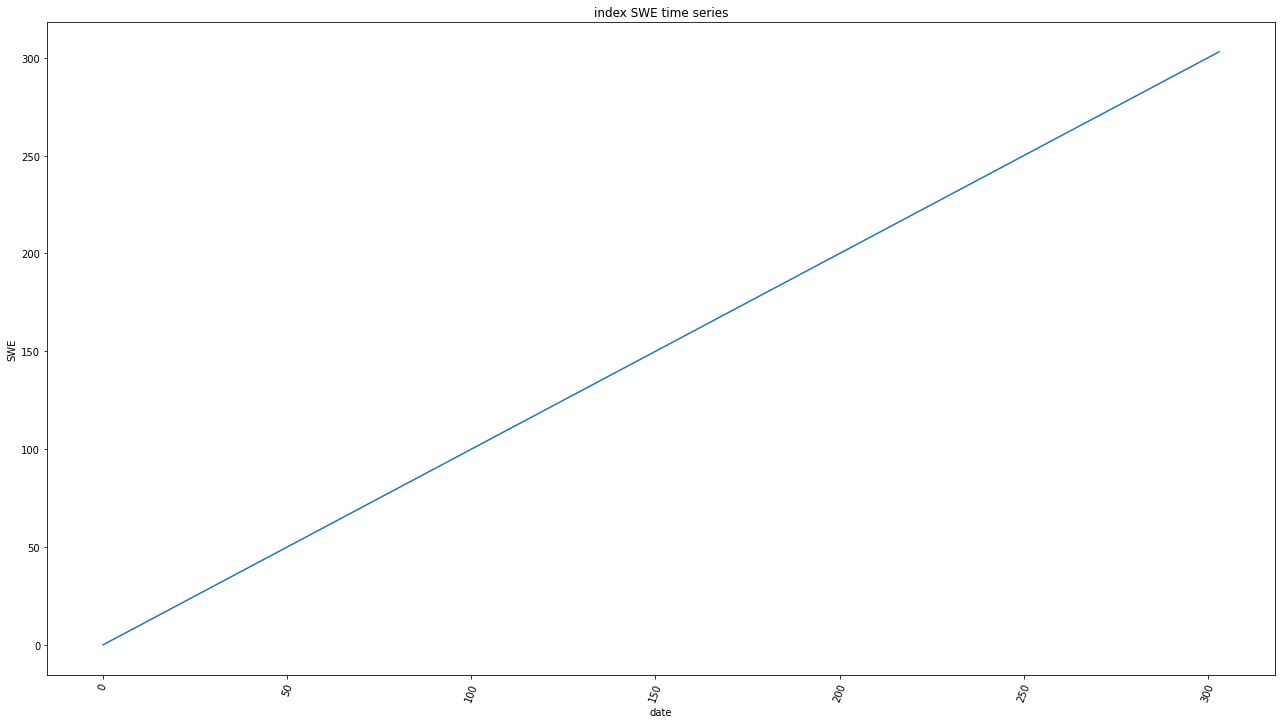

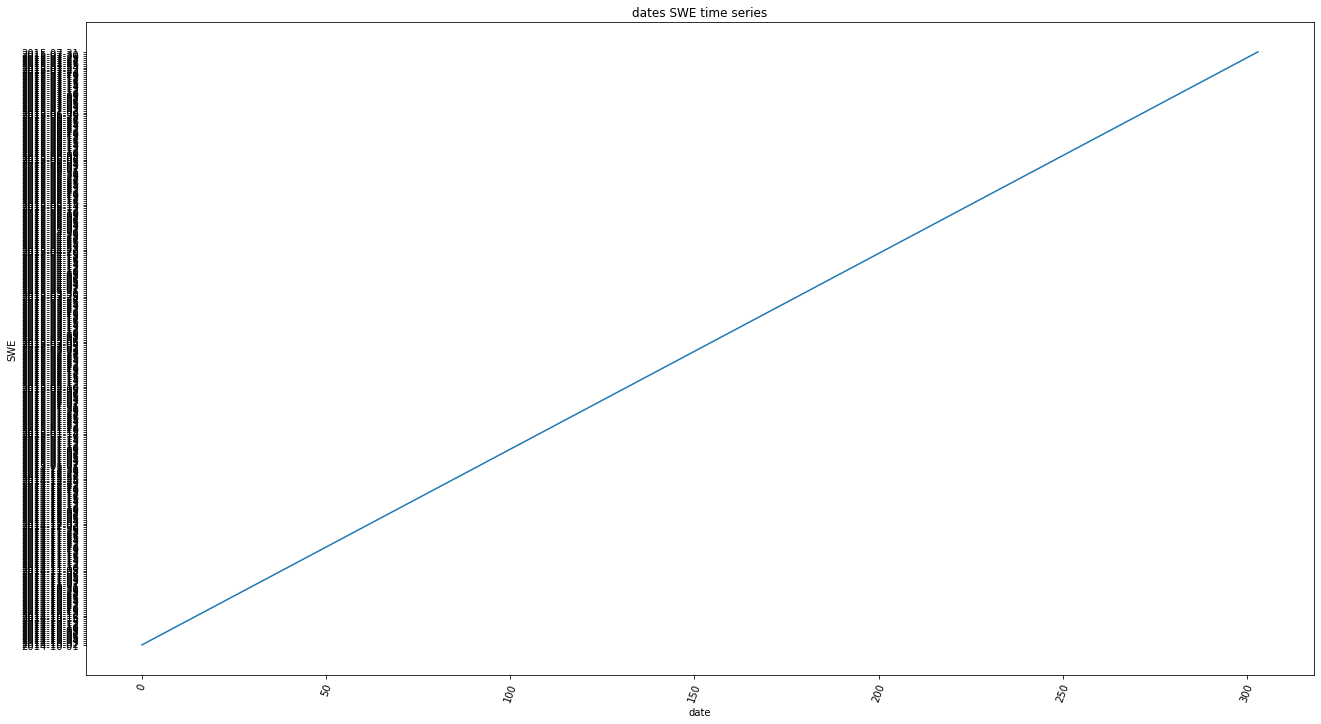

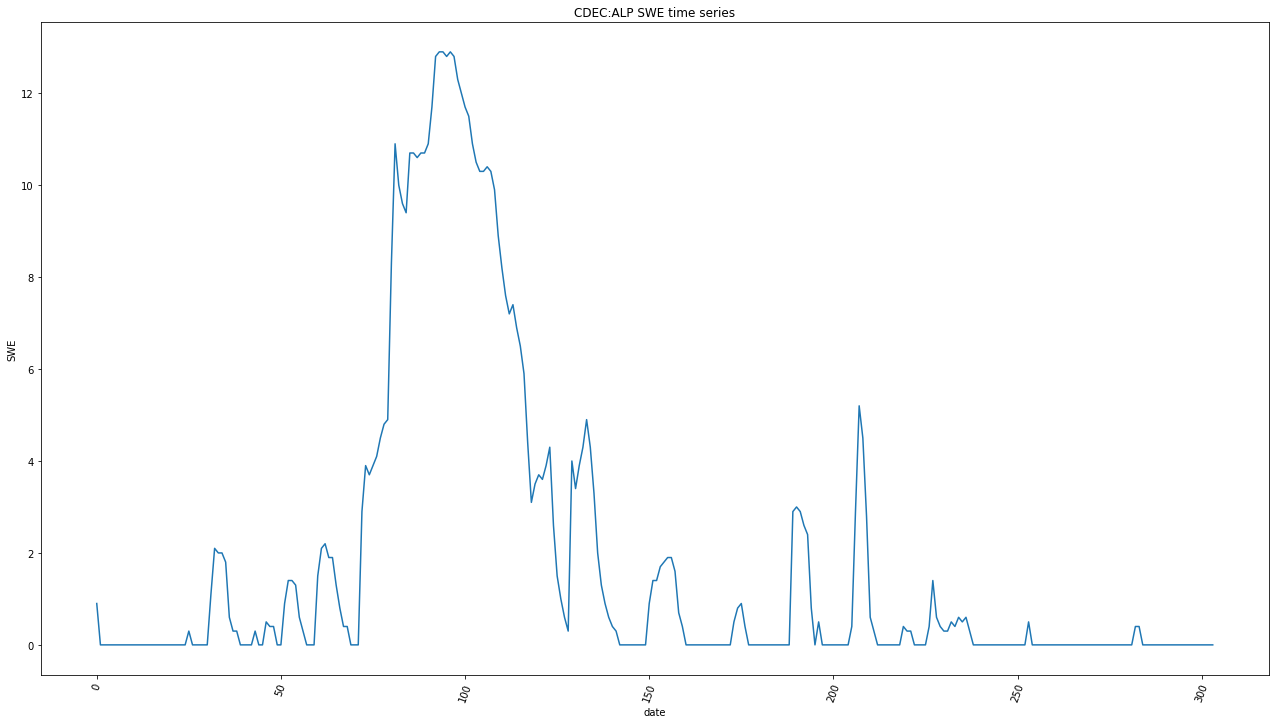

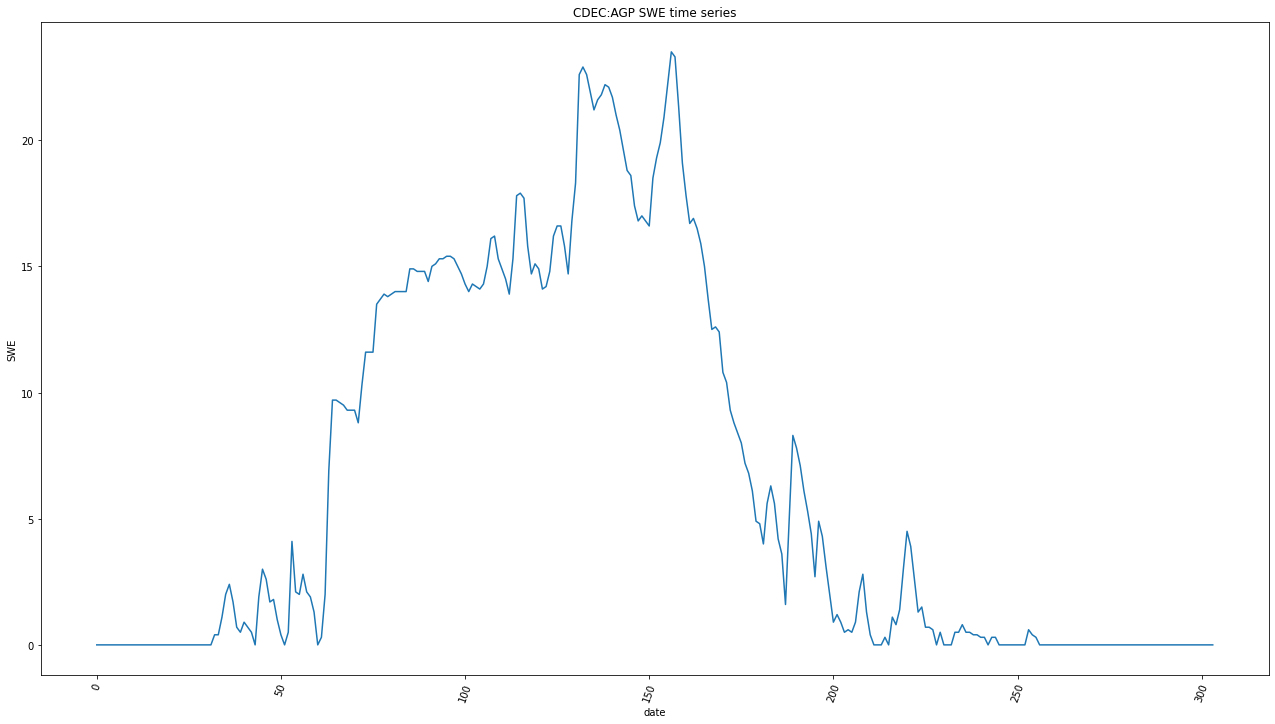

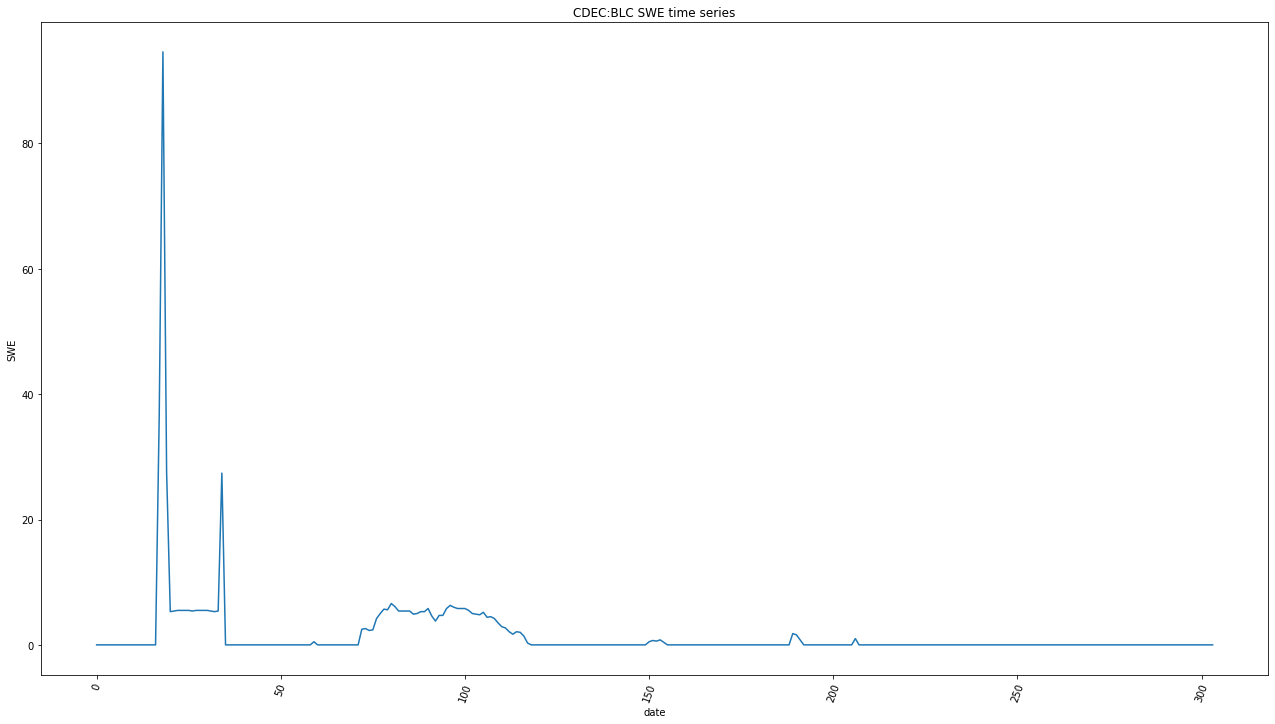

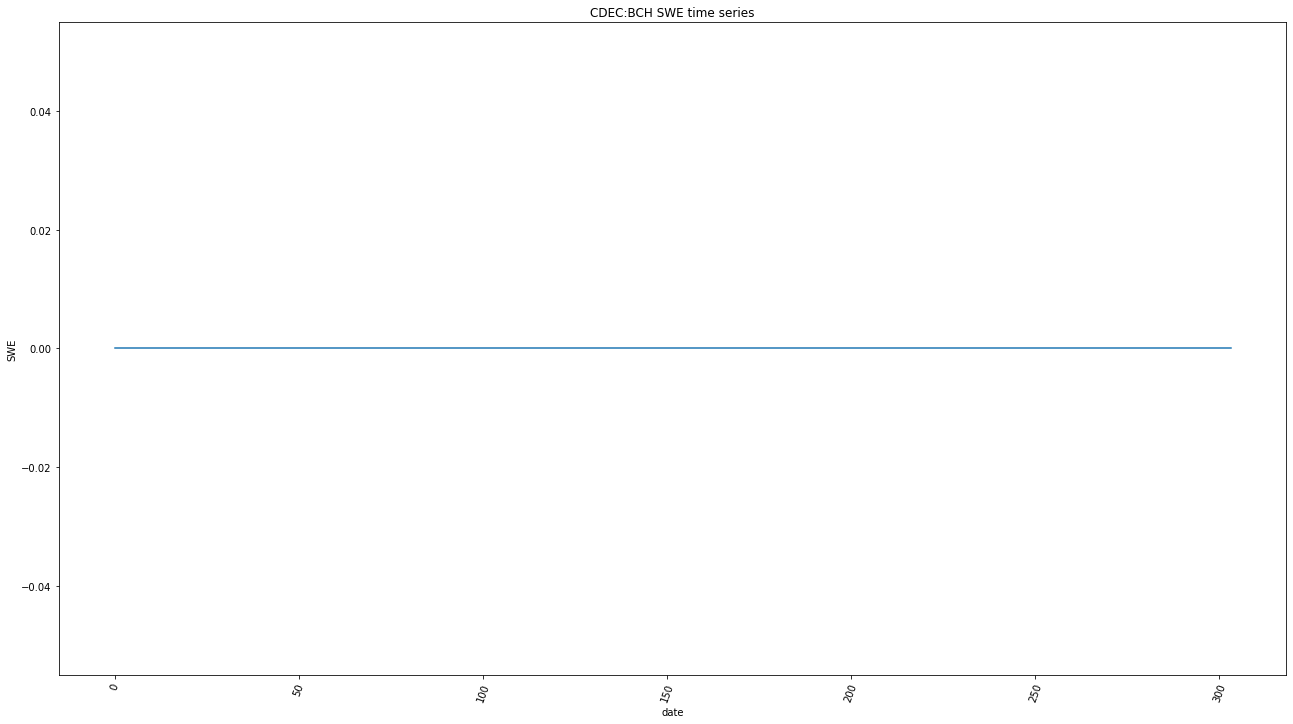

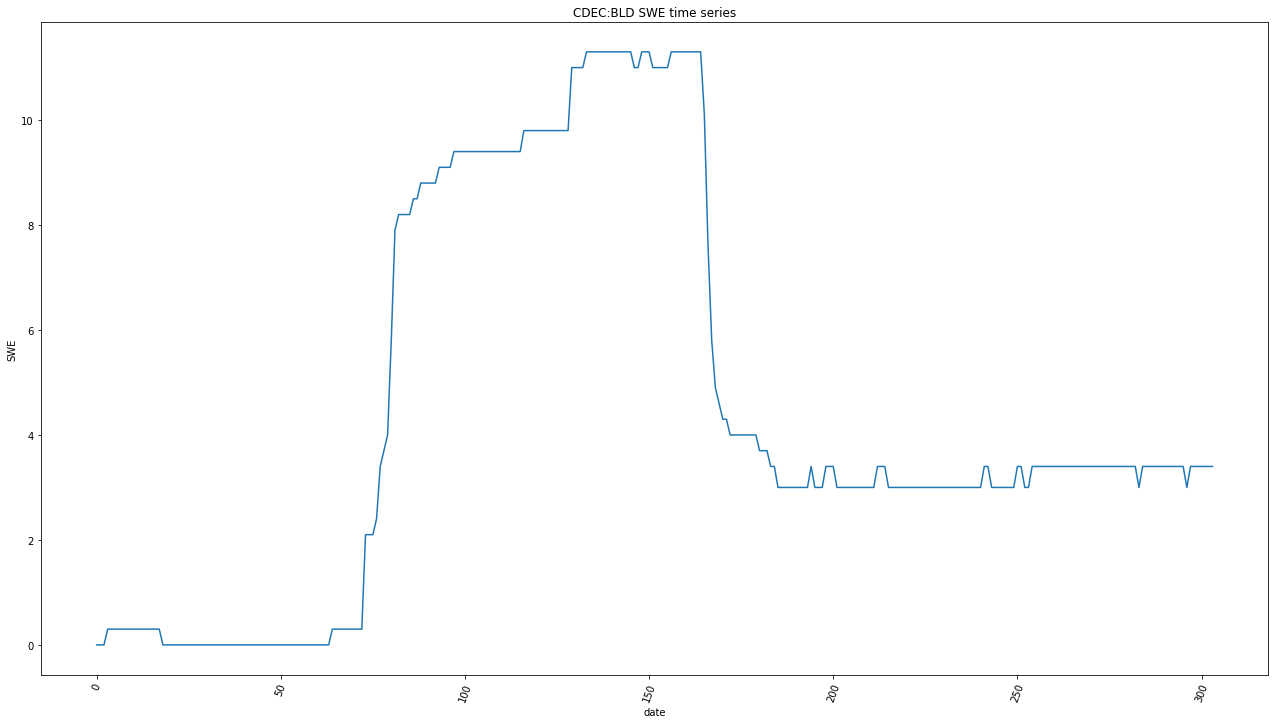

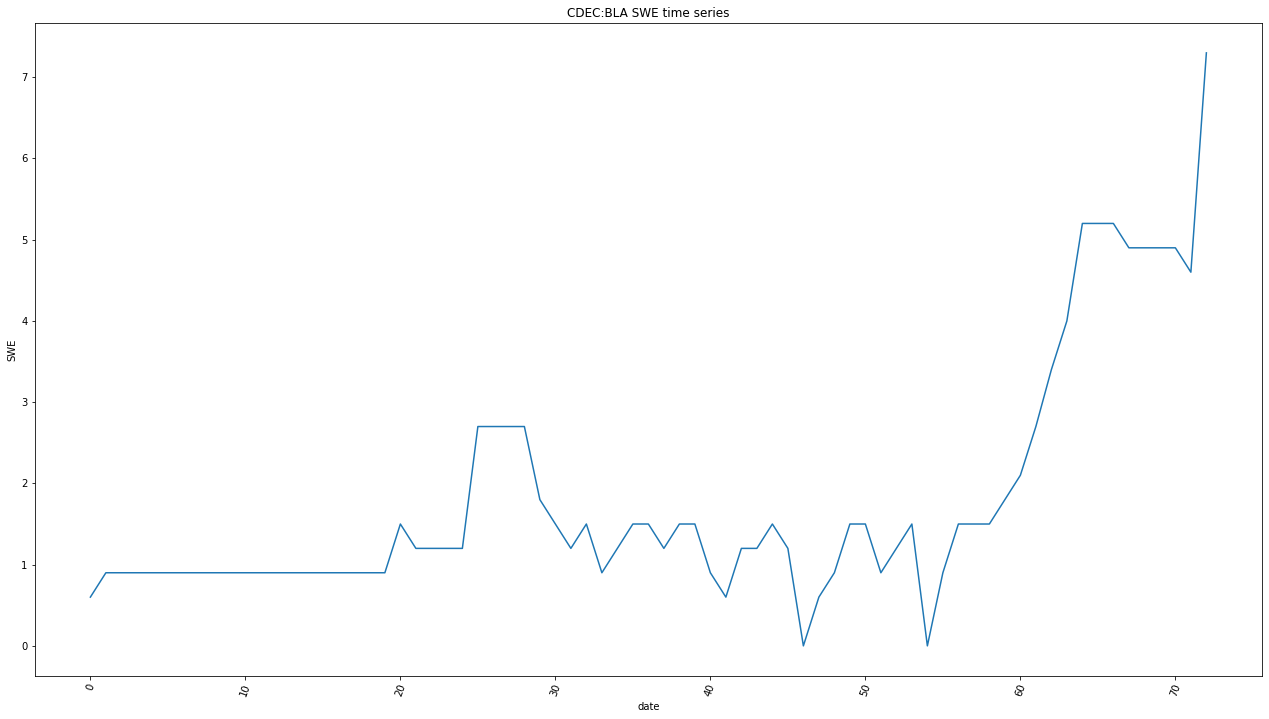

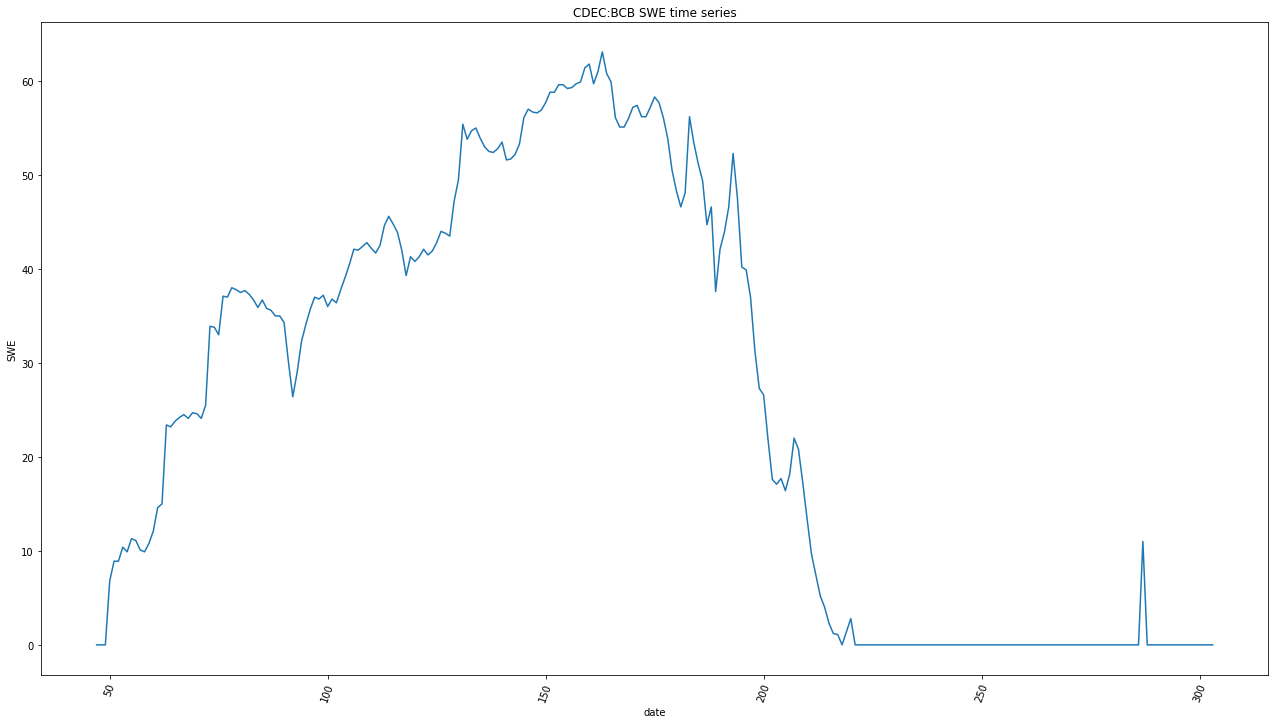

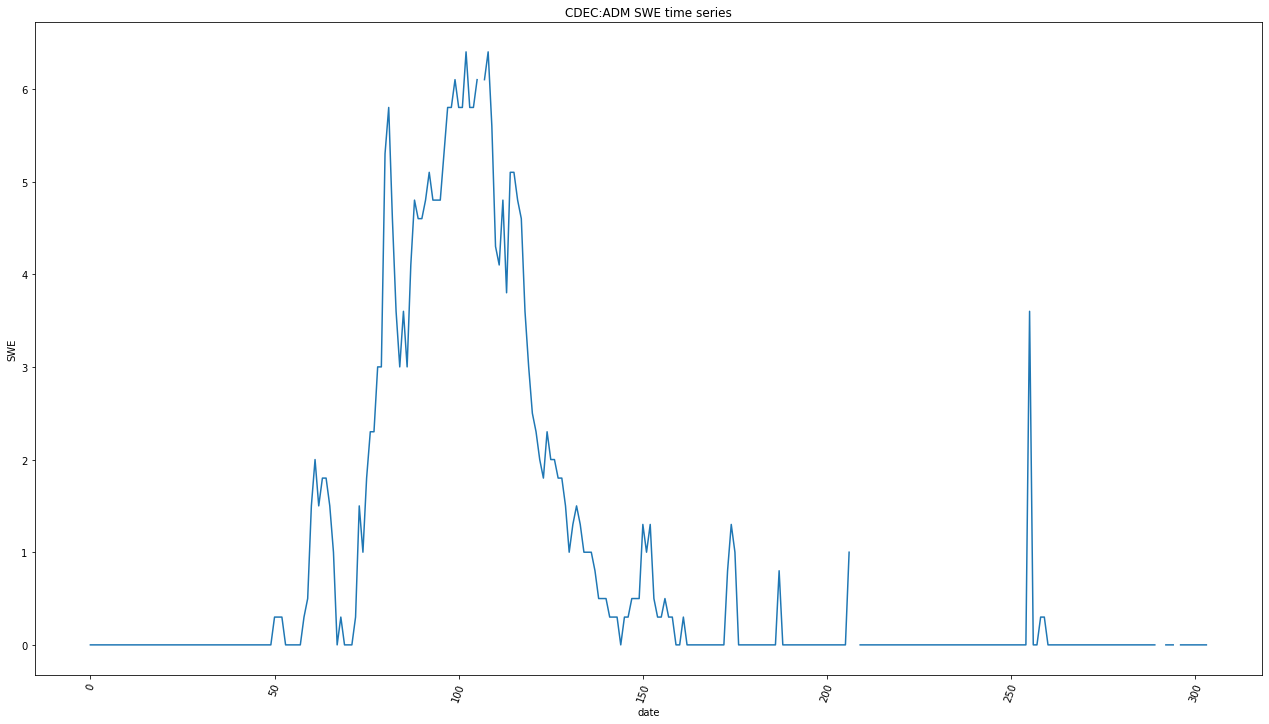

In [36]:
import matplotlib.pyplot as plt
import numpy as np

cols = year_df.columns
year_df.reset_index(inplace=True)

for s in np.arange(0,10,1):

       site = cols[s]

       fig, ax = plt.subplots(figsize=(22, 12))
       ax.plot(year_df.index, year_df[site])

       ax.set(xlabel='date', ylabel='SWE',
              title=f'{site} SWE time series')
       #ax.grid()
       plt.xticks(rotation=70)
       #fig.savefig("test.png")
       plt.show()

In [34]:
year_df.loc[50:80]

,dates,CDEC:ALP,CDEC:AGP,CDEC:BLC,CDEC:BCH,CDEC:BLD,CDEC:BLA,CDEC:BCB,CDEC:ADM,CDEC:BLS,...,SNOTEL:975_WA_SNTL,SNOTEL:978_ID_SNTL,SNOTEL:981_MT_SNTL,SNOTEL:982_WY_SNTL,SNOTEL:984_WA_SNTL,SNOTEL:988_ID_SNTL,SNOTEL:989_ID_SNTL,SNOTEL:990_WA_SNTL,SNOTEL:992_UT_SNTL,SNOTEL:999_WA_SNTL
50,2014-11-20,0.0,0.4,0.0,0.0,0.0,1.5,6.8,0.3,0.6,...,0.0,6.1,3.8,2.0,2.5,11.9,0.3,0.0,1.8,0.0
51,2014-11-21,0.9,0.0,0.0,0.0,0.0,0.9,8.9,0.3,0.6,...,0.0,6.6,3.8,2.3,2.5,11.9,0.5,0.0,1.8,0.0
52,2014-11-22,1.4,0.5,0.0,0.0,0.0,1.2,8.9,0.3,0.6,...,2.3,7.6,3.8,2.3,3.8,13.7,1.8,2.0,1.8,0.0
53,2014-11-23,1.4,4.1,0.0,0.0,0.0,1.5,10.4,0.0,0.9,...,3.0,7.9,3.8,2.3,5.8,14.7,1.8,2.5,3.3,2.0
54,2014-11-24,1.3,2.1,0.0,0.0,0.0,0.0,9.9,0.0,0.6,...,5.3,8.1,3.6,2.0,6.9,16.5,1.8,4.6,4.1,5.6
55,2014-11-25,0.6,2.0,0.0,0.0,0.0,0.9,11.3,0.0,0.6,...,6.4,8.4,3.8,2.5,7.6,19.3,2.5,5.1,4.1,8.4
56,2014-11-26,0.3,2.8,0.0,0.0,0.0,1.5,11.1,0.0,0.6,...,13.7,8.4,5.6,3.8,6.6,20.1,2.8,9.4,4.3,10.2
57,2014-11-27,0.0,2.1,0.0,0.0,0.0,1.5,10.1,0.0,0.6,...,14.7,8.1,5.8,4.1,5.6,21.3,1.5,9.9,4.3,10.2
58,2014-11-28,0.0,1.9,0.0,0.0,0.0,1.5,9.9,0.3,0.6,...,15.0,8.1,5.1,4.1,4.3,19.8,0.8,9.4,4.3,6.4
59,2014-11-29,0.0,1.3,0.5,0.0,0.0,1.8,10.8,0.5,0.6,...,16.8,8.1,3.6,4.3,4.3,20.8,0.5,9.1,4.3,5.8


# Code for generating ML dataframe using nearest in situ monitoring sites

In [ ]:
import GeoDF

# GeoDF used to create a dataframe for ML model development. Its function is to connect in situ observations to gridded locations
for region in region_list:
    path = f"{HOME}/SWEMLv2.0/data/ASO/{region}/{output_res}M_SWE_parquet"
    if os.path.isdir(path) == True:
        print(region)
        #load snotel meta location data, use haversive function
        GeoDF.fetch_snotel_sites_for_cellids(region, output_res) # Using known up to date sites

        # Get geophysical attributes for each site, need to see how to add output resolution
        gdf = GeoDF.GeoSpatial(region, output_res)

        #use geodataframe with lat/long meta of all sites to determine slope, aspect, and elevation
        metadf = GeoDF.extract_terrain_data_threaded(gdf, region, output_res)
    else:
        print(f"No ASO data for {region}")




## Connect Snotel to each ASO obs

In [ ]:
import Obs_to_DF
output_res = 300

#Connect nearest snotel observations with ASO data, makes a parquet file for each date  -  test to see if this works
for region in region_list:
    path = f"{HOME}/SWEMLv2.0/data/ASO/{region}/{output_res}M_SWE_parquet"
    if os.path.isdir(path) == True:
        print(region)
        dates = []
        manual = False
        Obs_to_DF.Nearest_Snotel_2_obs_MultiProcess(region, output_res, manual, dates) 
    else:
        print(f"No ASO data for {region}")


In [ ]:
import GeoDF

output_res = 300

#Connect cell ids with ASO obs and snotel obs to geospatial features
for region in region_list:
    path = f"{HOME}/SWEMLv2.0/data/ASO/{region}/{output_res}M_SWE_parquet"
    if os.path.isdir(path) == True:
        print(region)
        GeoDF.add_geospatial_threaded(region, output_res)
    else:
        print(f"No ASO data for {region}")

# Get NASA VIIRS fraction snow covered area for each location 

sometimes have to run twice, fix...


* Need to re-run, did not grab all of the N_Co observations...

In [ ]:
# import importlib
# importlib.reload(get_VIIRS_SCA)

import get_VIIRS_SCA
output_res = 300
threshold = 20

#check to see if the VIIRS data is available locally, if not, get from CIROH AWS - I think all of this data is for the incorrect year...
#get_VIIRS_SCA.get_VIIRS_from_AWS()

#Connect VIIRS data to dataframes
for region in region_list:
    path = f"{HOME}/SWEMLv2.0/data/ASO/{region}/{output_res}M_SWE_parquet"
    if os.path.isdir(path) == True:
        print(region)
        get_VIIRS_SCA.augment_SCA_mutliprocessing(region, output_res, threshold)
    else:
        print(f"No ASO data for {region}")


In [3]:
import get_Precip

'''
note*, if using python > 3.9, you will likely need to change the ee package to from io import StringIO
'''

import os
HOME = os.path.expanduser('~')

#gets precipitation for each location, accumulates it through the water year

#set start/end date for a water year
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
output_res = 300
threshold = 20

region_list = ['S_Sierras', 'GBasin']

for region in region_list:
    path = f"{HOME}/SWEMLv2.0/data/ASO/{region}/{output_res}M_SWE_parquet"
    if os.path.isdir(path) == True:
        print(region)
        get_Precip.get_precip_threaded(region, output_res, years)
    else:
        print(f"No ASO data for {region}")

    #Connect precipitation to processed DFs
    get_Precip.Make_Precip_DF(region, output_res, threshold)


S_Sierras
['2013-04-03', '2013-04-29', '2013-05-03', '2013-05-25', '2013-06-01', '2013-06-08', '2014-03-20', '2014-03-23', '2014-03-24', '2014-04-06', '2014-04-07', '2014-04-14', '2014-04-20', '2014-04-23', '2014-04-28', '2014-04-29', '2014-05-02', '2014-05-03', '2014-05-11', '2014-05-12', '2014-05-17', '2014-05-27', '2014-05-31', '2014-06-05', '2015-02-17', '2015-03-05', '2015-03-25', '2015-03-26', '2015-04-03', '2015-04-09', '2015-04-12', '2015-04-15', '2015-04-26', '2015-04-27', '2015-04-28', '2015-05-03', '2015-05-27', '2015-05-28', '2015-05-31', '2015-06-08', '2015-06-09', '2016-03-26', '2016-04-01', '2016-04-07', '2016-04-16', '2016-04-26', '2016-05-09', '2016-05-27', '2016-06-07', '2016-06-14', '2016-06-21', '2016-06-26', '2016-07-08', '2017-01-28', '2017-01-29', '2017-07-17', '2017-07-18', '2017-07-19', '2017-07-27', '2017-08-15', '2017-08-16', '2018-03-04', '2018-04-22', '2018-04-23', '2018-04-25', '2018-04-26', '2018-05-28', '2018-06-01', '2018-06-02', '2019-03-09', '2019-03-

  8%|▊         | 24769/299557 [00:04<00:34, 7981.38it/s]

In [ ]:
import get_Seasonality

region = 'N_Co_Rockies'
output_res = 300
threshold = 20

#get the Day of season metric for each dataframe
get_Seasonality.get_DOS(region, output_res, threshold)

## Next steps
* Explore why errors in precip sites above
* add in situ obs - seasonality based on the historical neareste x monitoring stations - like a historical average to-date swe value unit hydrograph based on the day of year? This will include a historical time of year of normal swe value and a swe value of year compared to normal
* albedo metric


In [ ]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

HOME = os.path.expanduser('~')

region = 'N_Co_Rockies'
output_res = 300

Precippath = f"{HOME}/SWEMLv2.0/data/Precipitation/{region}/{output_res}M_NLDAS_Precip/sites/"

pptfiles = [filename for filename in os.listdir(Precippath)]

ppt = pd.read_parquet(f"{Precippath}NLDAS_PPT_N_Co_Rockies_300M_39.015_-107.027.parquet")
ppt.rename(columns={'datetime':'Date'}, inplace = True)
#ppt.set_index('cell_id', inplace=True)

ppt.head()


In [ ]:
DFpath = '/home/rjohnson18/SWEMLv2.0/data/TrainingDFs/N_Co_Rockies/300M_Resolution/PrecipVIIRSGeoObsDFs_20_fSCA_Thresh'
geofile = 'Precip_VIIRS_GeoObsDF_20160404.parquet'

GDF = pd.read_parquet(os.path.join(DFpath, geofile))
GDF

In [ ]:
import importlib
importlib.reload(get_Seasonality)

In [ ]:
import get_Seasonality

region = 'N_Co_Rockies'
output_res = 300
threshold = 20

#process snotel sites to make "snow hydrograph features" to determine above/below average WY conditions
get_Seasonality.seasonal_snotel()


#get the Day of season metric for each dataframe
get_Seasonality.add_Seasonality(region, output_res, threshold)

In [ ]:
import datetime
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
import os
import warnings
import pickle as pkl
warnings.filterwarnings("ignore")

HOME = os.path.expanduser('~')

region = 'N_Co_Rockies'
output_res = 300
threshold = 20


DFpath = f'{HOME}/SWEMLv2.0/data/TrainingDFs/{region}/{output_res}M_Resolution/Seasonality_PrecipVIIRSGeoObsDFs_{threshold}_fSCA_Thresh'
files = [filename for filename in os.listdir(DFpath)]

df = pd.read_parquet(os.path.join(DFpath, files[0]))
df

In [ ]:
# make a unit hydrograph ish meetric for each site

#load data
DFpath = f'{HOME}/SWEMLv2.0/data/SNOTEL_Data'
snotel =  pd.read_parquet(os.path.join(DFpath, 'seasonal_snotel.parquet'))

#find location average peak swe and divide dataframe by this number
#snotel = snotel/snotel.max(0)
snotel

In [ ]:
#load data
DFpath = f'{HOME}/SWEMLv2.0/data/SNOTEL_Data'
snotel =  pd.read_parquet(os.path.join(DFpath, 'ground_measures.parquet'))

#find location average peak swe and divide dataframe by this number
#snotel = snotel/snotel.max(0)
snotel = snotel.T

#change bad values = 7.65006, 9.60454, 27.139000,22.172265, 31.247021	  change - values to 0
cols = snotel.columns
for col in cols:
    snotel[col][(snotel[col]> 7.65) & (snotel[col]< 7.651)] = 0
    snotel[col][(snotel[col]> 9.604) & (snotel[col]< 9.605)] = 0
    snotel[col][(snotel[col]> 27.139) & (snotel[col]< 23.140)] = 0
    snotel[col][(snotel[col]> 22.172265) & (snotel[col]< 22.172266)] = 0
    snotel[col][(snotel[col]> 31.242265) & (snotel[col]< 31.242266)] = 0
    snotel[col][snotel[col]<0] = 0
snotel.reset_index(inplace = True)

#build in data checking script to fix outliers

In [ ]:
snotel.loc[250:300]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

site = cols[0]

fig, ax = plt.subplots(figsize=(22, 12))
ax.plot(snotel.index, snotel[site])

ax.set(xlabel='date', ylabel='SWE',
       title=f'{site} SWE time series')
#ax.grid()
plt.xticks(rotation=70)
#fig.savefig("test.png")
plt.show()

In [ ]:
def zscore(s, window, thresh=2, return_all=False):
    roll = s.rolling(window=window, min_periods=1, center=True)
    avg = roll.mean()
    std = roll.std(ddof=0)
    z = s.sub(avg).div(std)   
    m = z.between(-thresh, thresh)
    
    if return_all:
        return z, avg, std, m
    return s.where(m, avg)


N = 1000
np.random.seed(1)
#df = pd.DataFrame({'MW': np.sin(np.linspace(0, 10, num=N))+np.random.normal(scale=0.6, size=N)})

df =pd.DataFrame(snotel[cols[0]])

z, avg, std, m = zscore(df[cols[0]], window=2, return_all=True)

ax = plt.subplots(figsize=(22, 12))

df[cols[0]].plot(label='data')
avg.plot(label='mean')
df.loc[~m, cols[0]].plot(label='outliers', marker='o', ls='')
avg[~m].plot(label='replacement', marker='o', ls='')
plt.legend()

In [ ]:
N = 1000
np.random.seed(1)
df = pd.DataFrame({'MW': np.sin(np.linspace(0, 10, num=N))+np.random.normal(scale=0.6, size=N)})

z, avg, std, m = zscore(df['MW'], window=50, return_all=True)

ax = plt.subplots(figsize=(22, 12))

df['MW'].plot(label='data')
avg.plot(label='mean')
df.loc[~m, 'MW'].plot(label='outliers', marker='o', ls='')
avg[~m].plot(label='replacement', marker='o', ls='')
plt.legend()